In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
import numpy as np

In [21]:
#Importing data
import pandas as pd 
df= pd.read_excel(r'D:/Online_retail.xlsx') 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# 1. Summarizing data
df.shape
df.describe()


(541909, 8)

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [3]:
# 2. Missing values
df.isnull().sum()
print('The percentage of null value in the column description is: ',(np.round(df['Description'].isnull().sum()/df.shape[0])*100), 2)
print('The percentage of null value in the column Customer ID is: ',(np.round(df['CustomerID'].isnull().sum()/df.shape[0])*100), 2)
df['CustomerID'].isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The percentage of null value in the column description is:  0.0 2
The percentage of null value in the column Customer ID is:  0.0 2


135080

In [4]:
#Treating missing values
df=df.loc[~df[['Description', 'CustomerID']].isnull().all(axis=1), ]
df=df.dropna(axis=1)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [5]:
#Type of variable
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object

80995

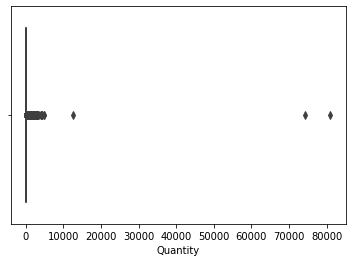

In [59]:
#Outliers
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df.loc[~df.Quantity<=0, 'Quantity' ])
df.Quantity.max()


In [5]:
#Data cleansing
df=df.loc[~(df['UnitPrice']<=0) & ~(df['Quantity']<=0), ]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France


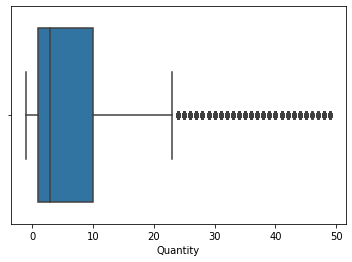

In [66]:
sns.boxplot(df.loc[(~df.Quantity<=0) & (df.Quantity<50), 'Quantity' ])

In [6]:
#Derive a new variable
df.loc[(df['Quantity'] >=1) & (df['Quantity'] < 10), 'Quantity_cluster'] = 'small purchase'
df.loc[(df['Quantity'] >=10) & (df['Quantity'] < 100), 'Quantity_cluster'] = 'medium purchase'
df.loc[(df['Quantity'] >=100) & (df['Quantity'] < 1000), 'Quantity_cluster'] = 'large purchase'
df.loc[(df['Quantity'] >=1000) & (df['Quantity'] < 10000), 'Quantity_cluster'] = 'bulk purchase'
df.loc[df['Quantity'] >=10000 , 'Quantity_cluster'] = 'Heavy order'
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,small purchase
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,small purchase
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,small purchase
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,small purchase
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,small purchase


In [7]:
import seaborn as sns
df['InvoiceMonth'] = pd.DatetimeIndex(df['InvoiceDate']).month
df.loc[df['InvoiceMonth']== 12, 'InvoiceMonth'] = 'Dec'
df.loc[df['InvoiceMonth']== 11, 'InvoiceMonth'] = 'Nov'
df.loc[df['InvoiceMonth']== 10, 'InvoiceMonth'] = 'Oct'
df.loc[df['InvoiceMonth']== 9, 'InvoiceMonth'] = 'Sep'
df.loc[df['InvoiceMonth']== 8, 'InvoiceMonth'] = 'Aug'
df.loc[df['InvoiceMonth']== 7, 'InvoiceMonth'] = 'July'
df.loc[df['InvoiceMonth']== 6, 'InvoiceMonth'] = 'June'
df.loc[df['InvoiceMonth']== 5, 'InvoiceMonth'] = 'May'
df.loc[df['InvoiceMonth']== 4, 'InvoiceMonth'] = 'Apr'
df.loc[df['InvoiceMonth']== 3, 'InvoiceMonth'] = 'Mar'
df.loc[df['InvoiceMonth']== 2, 'InvoiceMonth'] = 'Feb'
df.loc[df['InvoiceMonth']== 1, 'InvoiceMonth'] = 'Jan'
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_cluster,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,small purchase,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,small purchase,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,small purchase,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,small purchase,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,small purchase,Dec


In [8]:
#Select a variable
df.columns
df_Feature_select= df[['StockCode','Quantity', 'UnitPrice', 'InvoiceMonth',  'Country', 'Quantity_cluster']]
df_Feature_select

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'Quantity_cluster', 'InvoiceMonth'],
      dtype='object')

,StockCode,Quantity,UnitPrice,InvoiceMonth,Country,Quantity_cluster
0,85123A,6,2.55,Dec,United Kingdom,small purchase
1,71053,6,3.39,Dec,United Kingdom,small purchase
2,84406B,8,2.75,Dec,United Kingdom,small purchase
3,84029G,6,3.39,Dec,United Kingdom,small purchase
4,84029E,6,3.39,Dec,United Kingdom,small purchase
...,...,...,...,...,...,...
541904,22613,12,0.85,Dec,France,medium purchase
541905,22899,6,2.10,Dec,France,small purchase
541906,23254,4,4.15,Dec,France,small purchase
541907,23255,4,4.15,Dec,France,small purchase


In [9]:
#sort a variable
df_Feature_select.sort_values('UnitPrice', ascending=True)

,StockCode,Quantity,UnitPrice,InvoiceMonth,Country,Quantity_cluster
279045,PADS,1,0.001,July,United Kingdom,small purchase
361741,BANK CHARGES,1,0.001,Sep,United Kingdom,small purchase
157195,PADS,1,0.001,Apr,United Kingdom,small purchase
359871,PADS,1,0.001,Sep,United Kingdom,small purchase
523461,16045,100,0.040,Dec,United Kingdom,large purchase
...,...,...,...,...,...,...
268028,M,1,4287.630,July,United Kingdom,small purchase
297723,DOT,1,4505.170,Aug,United Kingdom,small purchase
173382,POST,1,8142.750,May,United Kingdom,small purchase
299982,B,1,11062.060,Aug,United Kingdom,small purchase


In [10]:
#Aggregate a variable
import numpy as np
df_Feature_select.groupby('InvoiceMonth')['Quantity'].agg([np.mean,np.sum, np.max, np.min])


,mean,sum,amax,amin
InvoiceMonth,,,,
Apr,10.613658,308815,3114,1
Aug,12.231244,421770,2880,1
Dec,10.113784,673487,80995,1
Feb,10.461354,283555,3906,1
Jan,11.303708,387785,74215,1
July,10.396144,401759,3186,1
June,10.818384,389213,1600,1
Mar,10.544535,377526,2160,1
May,10.942871,395738,4300,1


In [13]:
df_Feature_select.head()

,StockCode,Quantity,UnitPrice,InvoiceMonth,Country,Quantity_cluster
0,85123A,6,2.55,Dec,United Kingdom,small purchase
1,71053,6,3.39,Dec,United Kingdom,small purchase
2,84406B,8,2.75,Dec,United Kingdom,small purchase
3,84029G,6,3.39,Dec,United Kingdom,small purchase
4,84029E,6,3.39,Dec,United Kingdom,small purchase


In [9]:
#Balancing
from sklearn.utils import resample
df_Feature_select.Country.value_counts()
# separate minority and majority classes


United Kingdom          485123
Germany                   9040
France                    8407
EIRE                      7890
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1966
Portugal                  1501
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon 

In [10]:
##majority
majority = df_Feature_select[df_Feature_select.Country=='Belgium']

#minority
minority = df_Feature_select[df_Feature_select.Country=='Japan']

In [26]:
#upsample minority
#Undersample majority class - replace= False
# Oversample minority class - replace = True
country_upsampled = resample(minority,
                          replace=True, # sample with replacement
                          n_samples=len(majority)) # match number in majority class
                         

In [32]:
# combine majority and upsampled minority
upsampled = pd.concat([majority, country_upsampled])
upsampled.Country.value_counts()

Belgium    2069
Japan      2069
Name: Country, dtype: int64

In [11]:
df_Feature_select['Net_amnt']=df_Feature_select['Quantity']*df_Feature_select['UnitPrice']
df_Feature_select.head()

C:\Users\R SAINIVEDHANA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,StockCode,Quantity,UnitPrice,InvoiceMonth,Country,Quantity_cluster,Net_amnt
0,85123A,6,2.55,Dec,United Kingdom,small purchase,15.30
1,71053,6,3.39,Dec,United Kingdom,small purchase,20.34
2,84406B,8,2.75,Dec,United Kingdom,small purchase,22.00
3,84029G,6,3.39,Dec,United Kingdom,small purchase,20.34
4,84029E,6,3.39,Dec,United Kingdom,small purchase,20.34


In [12]:
df[df['Country']== 'France'].head()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_cluster,InvoiceMonth
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,medium purchase,Dec
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,medium purchase,Dec
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,medium purchase,Dec
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,medium purchase,Dec
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,medium purchase,Dec


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_cluster,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,small purchase,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,small purchase,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,small purchase,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,small purchase,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,small purchase,Dec


In [15]:
#Apriori algorithm
# Transactions done in France
pd.set_option('display.max_columns', 500)
basket_France = (df[df['Country'] =="France"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
basket_France.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,6PC WOOD PLATE SET DISPOSABLE,72 SWEETHEART FAIRY CAKE CASES,A PRETTY THANK YOU CARD,ABC TREASURE BOOK BOX,ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,"AIRLINE LOUNGE,METAL SIGN",ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALPHABET HEARTS STICKER SHEET,ALUMINIUM STAMPED HEART,AMETHYST CHUNKY BEAD BRACELET W STR,ANGEL DECORATION STARS ON DRESS,ANTIQUE ALL GLASS CANDLESTICK,ANTIQUE GLASS DRESSING TABLE POT,ANTIQUE GLASS PEDESTAL BOWL,ANTIQUE SILVER BAUBLE LAMP,ANTIQUE SILVER T-LIGHT GLASS,ANTIQUE SILVER TEA GLASS ENGRAVED,APPLE BATH SPONGE,AREA PATROLLED METAL SIGN,ASS COLOUR GLOWING TIARAS,ASS FLORAL PRINT MULTI SCREWDRIVER,ASSORTED BOTTLE TOP MAGNETS,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR MINI CASES,ASSORTED COLOUR T-LIGHT HOLDER,ASSORTED COLOURS SILK FAN,ASSORTED EASTER DECORATIONS BELLS,ASSORTED EASTER GIFT TAGS,"ASSORTED FLOWER COLOUR ""LEIS""",ASSORTED TUTTI FRUTTI BRACELET,ASSORTED TUTTI FRUTTI MIRROR,ASSORTED TUTTI FRUTTI SMALL PURSE,ASSTD DESIGN 3D PAPER STICKERS,ASSTD DESIGN RACING CAR PEN,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,ASSTD RASTA KEY-CHAINS,BABUSHKA LIGHTS STRING OF 10,BAG 125g SWIRLY MARBLES,BAG 250g SWIRLY MARBLES,BAKING MOULD CHOCOLATE CUPCAKES,BAKING MOULD EASTER EGG MILK CHOC,BAKING MOULD EASTER EGG WHITE CHOC,BAKING MOULD HEART MILK CHOCOLATE,BAKING MOULD HEART WHITE CHOCOLATE,BAKING SET 9 PIECE RETROSPOT,BAKING SET SPACEBOY DESIGN,BALLOON ART MAKE YOUR OWN FLOWERS,BALLOON PUMP WITH 10 BALLOONS,BALLOON WATER BOMB PACK OF 35,BALLOONS WRITING SET,BANQUET BIRTHDAY CARD,BASKET OF TOADSTOOLS,BATH BUILDING BLOCK WORD,BEADED CRYSTAL HEART BLUE LARGE,BELLE JARDINIERE CUSHION COVER,BEWARE OF THE CAT METAL SIGN,BIG DOUGHNUT FRIDGE MAGNETS,BILI NUT AND WOOD NECKLACE,BINGO SET,BIRD DECORATION GREEN POLKADOT,BIRD DECORATION RED RETROSPOT,BIRD HOUSE HOT WATER BOTTLE,BIRDS MOBILE VINTAGE DESIGN,"BIRTHDAY CARD, RETRO SPOT",BISCUIT TIN 50'S CHRISTMAS,BISCUIT TIN VINTAGE CHRISTMAS,BISCUIT TIN VINTAGE GREEN,BISCUIT TIN VINTAGE RED,BLACK AND WHITE CAT BOWL,BLACK CANDELABRA T-LIGHT HOLDER,BLACK CHRISTMAS TREE 120CM,BLACK CHUNKY BEAD BRACELET W STRAP,BLACK ENAMEL FLOWER RING,BLACK KITCHEN SCALES,BLACK LOVE BIRD 

In [16]:
# Defining the hot encoding function to make the data suitable  
# for the concerned libraries 
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1
# Encoding the datasets 
basket_encoded = basket_France.applymap(hot_encode) 
basket_France = basket_encoded 
basket_France

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,6PC WOOD PLATE SET DISPOSABLE,72 SWEETHEART FAIRY CAKE CASES,A PRETTY THANK YOU CARD,ABC TREASURE BOOK BOX,ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,"AIRLINE LOUNGE,METAL SIGN",ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALPHABET HEARTS STICKER SHEET,ALUMINIUM STAMPED HEART,AMETHYST CHUNKY BEAD BRACELET W STR,ANGEL DECORATION STARS ON DRESS,ANTIQUE ALL GLASS CANDLESTICK,ANTIQUE GLASS DRESSING TABLE POT,ANTIQUE GLASS PEDESTAL BOWL,ANTIQUE SILVER BAUBLE LAMP,ANTIQUE SILVER T-LIGHT GLASS,ANTIQUE SILVER TEA GLASS ENGRAVED,APPLE BATH SPONGE,AREA PATROLLED METAL SIGN,ASS COLOUR GLOWING TIARAS,ASS FLORAL PRINT MULTI SCREWDRIVER,ASSORTED BOTTLE TOP MAGNETS,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR MINI CASES,ASSORTED COLOUR T-LIGHT HOLDER,ASSORTED COLOURS SILK FAN,ASSORTED EASTER DECORATIONS BELLS,ASSORTED EASTER GIFT TAGS,"ASSORTED FLOWER COLOUR ""LEIS""",ASSORTED TUTTI FRUTTI BRACELET,ASSORTED TUTTI FRUTTI MIRROR,ASSORTED TUTTI FRUTTI SMALL PURSE,ASSTD DESIGN 3D PAPER STICKERS,ASSTD DESIGN RACING CAR PEN,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,ASSTD RASTA KEY-CHAINS,BABUSHKA LIGHTS STRING OF 10,BAG 125g SWIRLY MARBLES,BAG 250g SWIRLY MARBLES,BAKING MOULD CHOCOLATE CUPCAKES,BAKING MOULD EASTER EGG MILK CHOC,BAKING MOULD EASTER EGG WHITE CHOC,BAKING MOULD HEART MILK CHOCOLATE,BAKING MOULD HEART WHITE CHOCOLATE,BAKING SET 9 PIECE RETROSPOT,BAKING SET SPACEBOY DESIGN,BALLOON ART MAKE YOUR OWN FLOWERS,BALLOON PUMP WITH 10 BALLOONS,BALLOON WATER BOMB PACK OF 35,BALLOONS WRITING SET,BANQUET BIRTHDAY CARD,BASKET OF TOADSTOOLS,BATH BUILDING BLOCK WORD,BEADED CRYSTAL HEART BLUE LARGE,BELLE JARDINIERE CUSHION COVER,BEWARE OF THE CAT METAL SIGN,BIG DOUGHNUT FRIDGE MAGNETS,BILI NUT AND WOOD NECKLACE,BINGO SET,BIRD DECORATION GREEN POLKADOT,BIRD DECORATION RED RETROSPOT,BIRD HOUSE HOT WATER BOTTLE,BIRDS MOBILE VINTAGE DESIGN,"BIRTHDAY CARD, RETRO SPOT",BISCUIT TIN 50'S CHRISTMAS,BISCUIT TIN VINTAGE CHRISTMAS,BISCUIT TIN VINTAGE GREEN,BISCUIT TIN VINTAGE RED,BLACK AND WHITE CAT BOWL,BLACK CANDELABRA T-LIGHT HOLDER,BLACK CHRISTMAS TREE 120CM,BLACK CHUNKY BEAD BRACELET W STRAP,BLACK ENAMEL FLOWER RING,BLACK KITCHEN SCALES,BLACK LOVE BIRD 

In [17]:
#!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules 
#Building the model 
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True) 
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.076531,0.765306,0.076531,1.000,1.306667,0.017961,inf
259,"(RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...",(POSTAGE),0.051020,0.765306,0.051020,1.000,1.306667,0.011974,inf
270,"(PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...",(POSTAGE),0.053571,0.765306,0.053571,1.000,1.306667,0.012573,inf
301,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975,7.644000,0.086474,34.897959
300,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975,7.077778,0.085433,34.489796


In [22]:
#cohort analysis
#df= pd.read_excel(r'D:/Online_retail.xlsx') 
import datetime as dt
def get_month(x): return dt.datetime(x.year, x.month, 1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
invoice_year, invoice_month, invoice_day = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_date_int(df, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['CohortIndex'] = years_diff * 12 + months_diff + 1

df.tail()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5.0


In [23]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

cohort_counts = cohort_data.reset_index().pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='CustomerID')

cohort_counts


CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Retention Rates')

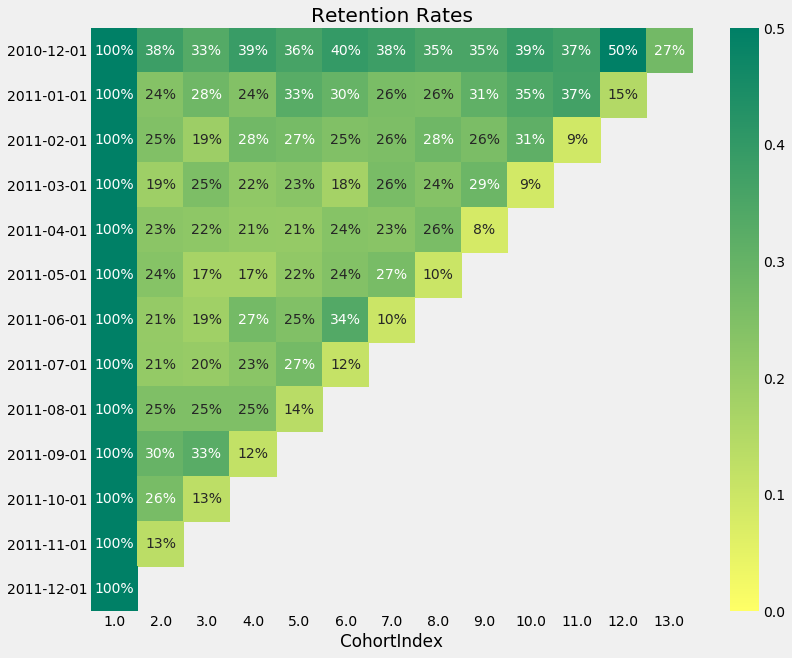

In [25]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index=retention.index.date
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
plt.title('Retention Rates')

sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.0,
           vmax=0.5,
           cmap='summer_r')
plt.show()

In [26]:
#RFM
df['InvoiceDay'] = df['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))

df['TotalSum'] = df['Quantity'] * df['UnitPrice']
df.drop(['CohortMonth', 'InvoiceMonth', 'CohortIndex'], axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [27]:
act_date = max(df['InvoiceDay'] + dt.timedelta(1))
act_date

Timestamp('2011-12-10 00:00:00')

In [28]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (act_date - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalSum' : 'sum'
})

rfm.rename(columns = {'InvoiceDate' : 'Recency', 
                      'InvoiceNo' : 'Frequency', 
                      'TotalSum' : 'MonetaryValue'}, inplace = True)
rfm.head()


,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [29]:
r_labels = range(3, 0, -1)
r_groups = pd.qcut(rfm.Recency, q = 3, labels = r_labels)

f_labels = range(1, 4)
f_groups = pd.qcut(rfm.Frequency, q = 3, labels = f_labels)

m_labels = range(1, 4)
m_groups = pd.qcut(rfm.MonetaryValue, q = 3, labels = m_labels)

In [30]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

#rfm = rfm.assign(R=r_groups,F=f_groups,M=m_groups)

rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,3.0
12347.0,2,182,4310.00,3,3,3,333,9.0
12348.0,75,31,1797.24,2,2,3,223,7.0
12349.0,18,73,1757.55,3,2,3,323,8.0
12350.0,310,17,334.40,1,1,1,111,3.0


In [31]:
score_labels = ['Bronze', 'Silver', 'Gold']
score_groups = pd.qcut(rfm.RFM_Score, q = 3, labels = score_labels)
rfm['Robust RFM Level'] = score_groups.values

rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Robust RFM Level
CustomerID,,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,3.0,Bronze
12347.0,2,182,4310.00,3,3,3,333,9.0,Gold
12348.0,75,31,1797.24,2,2,3,223,7.0,Silver
12349.0,18,73,1757.55,3,2,3,323,8.0,Gold
12350.0,310,17,334.40,1,1,1,111,3.0,Bronze


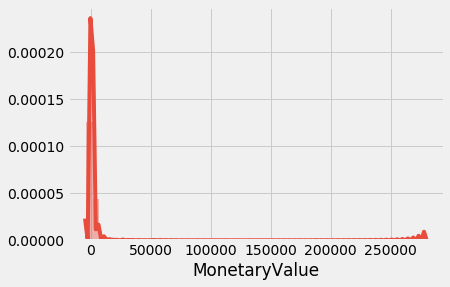

In [29]:
#graph
sns.distplot(rfm['MonetaryValue'],  hist=True, color='#e74c3c') 


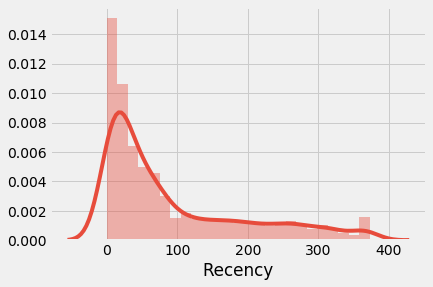

In [30]:
sns.distplot(rfm['Recency'],  hist=True, color='#e74c3c') 

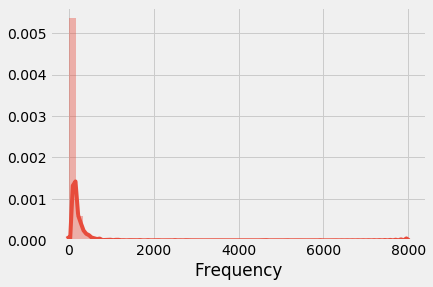

In [31]:
sns.distplot(rfm['Frequency'],  hist=True, color='#e74c3c') 

In [42]:
rfm_log = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1)

np.all(np.isfinite(rfm_log['Frequency']))
np.all(np.isfinite(rfm_log['MonetaryValue']))
np.all(np.isfinite(rfm_log['Recency']))
rfm_log.dtypes
rfm_log['MonetaryValue'] = rfm_log.replace([np.inf, -np.inf], 0.0)
rfm_log['Frequency'] = rfm_log.replace([np.inf, -np.inf], 0.0)
rfm_log['Recency'] = rfm_log.replace([np.inf, -np.inf], 0.0)
np.all(np.isfinite(rfm_log['Frequency']))
rfm_log = rfm_log.dropna()

True

False

False

Recency          float64
Frequency        float64
MonetaryValue    float64
dtype: object

True

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
rfm_normalized= scaler.transform(rfm_log)
rfm_scaled = pd.DataFrame(rfm_normalized, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.describe()

StandardScaler()

,Recency,Frequency,MonetaryValue
count,4.372000e+03,4.372000e+03,4.372000e+03
mean,-1.383168e-16,-1.383168e-16,-1.383168e-16
std,1.000114e+00,1.000114e+00,1.000114e+00
min,-2.452936e+00,-2.452936e+00,-2.452936e+00
25%,-6.149346e-01,-6.149346e-01,-6.149346e-01
50%,1.404180e-01,1.404180e-01,1.404180e-01
75%,8.370276e-01,8.370276e-01,8.370276e-01
max,1.472590e+00,1.472590e+00,1.472590e+00


In [49]:
from sklearn.cluster import KMeans
kc = KMeans(n_clusters=3, random_state=42)
kc.fit(rfm_scaled)
rfm['RFM_Cluster'] = kc.labels_

rfm_s=rfm.groupby('RFM_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count']})


rfm_s.rename(columns = {'mean' : 'Mean','count' : 'Count'},
               inplace = True)
#display(rfm_s.style.background_gradient(cmap='summer_r'))

KMeans(n_clusters=3, random_state=42)

In [48]:
rfm['RFM_Cluster']=rfm['RFM_Cluster'].map({0: 'K_Bronze', 1: 'K_Gold',2:'K_Silver'})
rfm.sample(10)
rfm.RFM_Cluster.value_counts()
rfm['Robust RFM Level'].value_counts()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Robust RFM Level,RFM_Cluster
CustomerID,,,,,,,,,,
15291.0,25,109,4596.51,2,3,3,233,8.0,Gold,K_Silver
12917.0,128,2,594.00,1,1,2,112,4.0,Bronze,K_Bronze
17630.0,169,26,503.60,1,2,2,122,5.0,Bronze,K_Bronze
15531.0,8,228,2007.44,3,3,3,333,9.0,Gold,K_Gold
13144.0,332,3,110.95,1,1,1,111,3.0,Bronze,K_Bronze
14037.0,176,28,147.20,1,2,1,121,4.0,Bronze,K_Bronze
16351.0,332,8,153.90,1,1,1,111,3.0,Bronze,K_Bronze
14314.0,106,8,120.00,1,1,1,111,3.0,Bronze,K_Bronze
14041.0,266,21,141.41,1,1,1,111,3.0,Bronze,K_Bronze


K_Silver    1892
K_Bronze    1534
K_Gold       946
Name: RFM_Cluster, dtype: int64

Bronze    1918
Gold      1280
Silver    1174
Name: Robust RFM Level, dtype: int64